In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#this is a function online for zipcode generation (it can also give us median household income but it's unclear when it has been last updated)
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)
from uszipcode import Zipcode

#these two don't end up being used yet
from pprint import pprint
import json


source1 = 'Rolling Sales NYC/2018_brooklyn.csv'
source2 = 'Rolling Sales NYC/rollingsales_brooklyn_2019.csv'
df_2018 = pd.read_csv(source1)
df_2019= pd.read_csv(source2)

df_2018 = df_2018.rename(columns={"SALE PRICE\n": "SALE PRICE", "SALE DATE\n": "SALE DATE", "ZIP CODE\n" : "ZIP CODE"})
df_2019 = df_2019.rename(columns={" SALE PRICE ": "SALE PRICE"})

df_2018.dtypes

BOROUGH\n                                  int64
NEIGHBORHOOD\n                            object
BUILDING CLASS CATEGORY\n                 object
TAX CLASS AS OF FINAL ROLL 18/19          object
BLOCK\n                                    int64
LOT\n                                      int64
EASE-MENT\n                              float64
BUILDING CLASS AS OF FINAL ROLL 18/19     object
ADDRESS\n                                 object
APARTMENT NUMBER\n                        object
ZIP CODE                                 float64
RESIDENTIAL UNITS\n                       object
COMMERCIAL UNITS\n                       float64
TOTAL UNITS\n                             object
LAND SQUARE FEET\n                        object
GROSS SQUARE FEET\n                       object
YEAR BUILT\n                             float64
TAX CLASS AT TIME OF SALE\n                int64
BUILDING CLASS AT TIME OF SALE\n          object
SALE PRICE                                object
SALE DATE           

In [2]:
#DF2 is the NYC Rolling Sales, this was pulled from the csv in the first box (source2)
df_2018['SALE PRICE'] = df_2018['SALE PRICE'].str.replace(',','')
df_2018['SALE PRICE'] = df_2018['SALE PRICE'].str.replace('$','').astype(float)
df_2019['SALE PRICE'] = df_2019['SALE PRICE'].str.replace(',','').astype(float)

df_2018 = df_2018.loc[df_2018['SALE PRICE'] > 0]
df_2019 = df_2019.loc[df_2019['SALE PRICE'] > 0]


#Create a boolean mask to sort by the month of September (Airbnb CSV is just September, we can discuss if this step is necessary together)
mask_Sept_2018 = (df_2018['SALE DATE'] > '9/0/2018') & (df_2018['SALE DATE'] <= '9/31/2018')
df_sept = df_2018.loc[mask_Sept_2018]
mask_Oct_2018 = (df_2018['SALE DATE'] > '10/0/2018') & (df_2018['SALE DATE'] <= '10/31/2018')
df_oct = df_2018.loc[mask_Oct_2018]
mask_Nov_2018 = (df_2018['SALE DATE'] > '11/0/2018') & (df_2018['SALE DATE'] <= '11/31/2018')
df_nov = df_2018.loc[mask_Nov_2018]
mask_Dec_2018 = (df_2018['SALE DATE'] > '12/0/2018') & (df_2018['SALE DATE'] <= '12/31/2018')
df_dec = df_2018.loc[mask_Dec_2018]
mask_Jan_2019 = (df_2019['SALE DATE'] > '1/0/2019') & (df_2019['SALE DATE'] <= '1/31/2019')
df_jan = df_2019.loc[mask_Jan_2019]
mask_Feb_2019 = (df_2019['SALE DATE'] > '2/0/2019') & (df_2019['SALE DATE'] <= '2/31/2019')
df_feb = df_2019.loc[mask_Feb_2019]
mask_Mar_2019 = (df_2019['SALE DATE'] > '3/0/2019') & (df_2019['SALE DATE'] <= '3/31/2019')
df_mar = df_2019.loc[mask_Mar_2019]

In [3]:
#Group NYC Sales data by average price by neighborhood
# df_2018_Allzips = df_2018.groupby("ZIP CODE").agg({'SALE PRICE':'mean'}).reset_index()
# df_2019_Allzips = df2_nonzero_sept.groupby("NEIGHBORHOOD").agg({' SALE PRICE ':'count'}).reset_index()

df_sept_allzips = df_sept.groupby("ZIP CODE").agg({"SALE PRICE" : "median"}).reset_index()
df_oct_allzips = df_oct.groupby("ZIP CODE").agg({"SALE PRICE" : "median"}).reset_index()
df_nov_allzips = df_nov.groupby("ZIP CODE").agg({"SALE PRICE" : "median"}).reset_index()
df_dec_allzips = df_dec.groupby("ZIP CODE").agg({"SALE PRICE" : "median"}).reset_index()
df_jan_allzips = df_jan.groupby("ZIP CODE").agg({"SALE PRICE" : "median"}).reset_index()
df_feb_allzips = df_feb.groupby("ZIP CODE").agg({"SALE PRICE" : "median"}).reset_index()
df_mar_allzips = df_mar.groupby("ZIP CODE").agg({"SALE PRICE" : "median"}).reset_index()

In [4]:
dates = [' Sept 2018',' Oct 2018',' Nov 2018',' Dec 2018',' Jan 2019',' Feb 2019',' Mar 2019', '']

df_all_months = pd.merge(df_sept_allzips,df_oct_allzips, on = 'ZIP CODE',how = 'outer', suffixes = (dates[0],dates[1]))
df_all_months = pd.merge(df_all_months,df_nov_allzips, on = 'ZIP CODE',how = 'outer', suffixes = (dates[2],dates[3]))
df_all_months = pd.merge(df_all_months,df_dec_allzips, on = 'ZIP CODE',how = 'outer', suffixes = (dates[2],dates[3]))
df_all_months = pd.merge(df_all_months,df_jan_allzips, on = 'ZIP CODE',how = 'outer', suffixes = (dates[4],dates[5]))
df_all_months = pd.merge(df_all_months,df_feb_allzips, on = 'ZIP CODE',how = 'outer', suffixes = (dates[4],dates[5]))
df_all_months = pd.merge(df_all_months,df_mar_allzips, on = 'ZIP CODE',how = 'outer', suffixes = (dates[6],dates[7]))


In [5]:
Ltrain_zipcodes = [11249,11222,11211,11206,11237,11378,11387,11233,11212,11207,11236]

df_all_months_L = df_all_months[df_all_months['ZIP CODE'].isin(Ltrain_zipcodes)]

df_all_months_L

,ZIP CODE,SALE PRICE Sept 2018,SALE PRICE Oct 2018,SALE PRICE Nov 2018,SALE PRICE Dec 2018,SALE PRICE Jan 2019,SALE PRICE Feb 2019,SALE PRICE
4,11206.0,1235000.0,681799.5,729474.0,749228.0,749228.0,698112.0,1350000.0
5,11207.0,650000.0,515000.0,580000.0,499999.0,488125.0,590585.0,480000.0
9,11211.0,1200000.0,774429.5,778526.0,995000.0,1250000.0,1359500.0,960000.0
10,11212.0,515000.0,450000.0,696500.0,613740.0,537500.0,717500.0,610250.0
20,11222.0,2100000.0,1353750.0,1117500.0,1049950.0,1575000.0,1337500.0,1398843.5
30,11233.0,917225.0,966000.0,772000.0,900000.0,845000.0,625000.0,735000.0
33,11236.0,500000.0,550000.0,535000.0,590000.0,500000.0,585000.0,550000.0
34,11237.0,842500.0,850000.0,1225000.0,801250.0,1750000.0,1637500.0,1550000.0
36,11249.0,999062.0,1270000.0,961677.0,984500.0,1590551.0,1462747.0,1517500.0


In [6]:
Sales_Price_Change_Sep_Nov = ((df_all_months_L["SALE PRICE Nov 2018"]-df_all_months_L["SALE PRICE Sept 2018"])/df_all_months_L["SALE PRICE Sept 2018"])*100
df_all_months_L["Sales_Price_Change_Sep_Nov"] = Sales_Price_Change_Sep_Nov

df_all_months_L= df_all_months_L.sort_values(by=["Sales_Price_Change_Sep_Nov"], ascending=False)

Sales_Price_Change_Nov_Jan = ((df_all_months_L["SALE PRICE Jan 2019"]-df_all_months_L["SALE PRICE Nov 2018"])/df_all_months_L["SALE PRICE Nov 2018"])*100
df_all_months_L["Sales_Price_Change_Nov_Jan"] = Sales_Price_Change_Nov_Jan

df_all_months_L= df_all_months_L.sort_values(by=["Sales_Price_Change_Nov_Jan"], ascending=False)

df_all_months_L["ZIP CODE"].round(-1)

#Top5_Summary3.dtypes
#Top5_Summary3.head()
df_all_months_L.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ZIP CODE,SALE PRICE Sept 2018,SALE PRICE Oct 2018,SALE PRICE Nov 2018,SALE PRICE Dec 2018,SALE PRICE Jan 2019,SALE PRICE Feb 2019,SALE PRICE,Sales_Price_Change_Sep_Nov,Sales_Price_Change_Nov_Jan
36,11249.0,999062.0,1270000.0,961677.0,984500.0,1590551.0,1462747.0,1517500.0,-3.742010,65.393474
9,11211.0,1200000.0,774429.5,778526.0,995000.0,1250000.0,1359500.0,960000.0,-35.122833,60.559827
34,11237.0,842500.0,850000.0,1225000.0,801250.0,1750000.0,1637500.0,1550000.0,45.400593,42.857143
20,11222.0,2100000.0,1353750.0,1117500.0,1049950.0,1575000.0,1337500.0,1398843.5,-46.785714,40.939597
30,11233.0,917225.0,966000.0,772000.0,900000.0,845000.0,625000.0,735000.0,-15.833083,9.455959


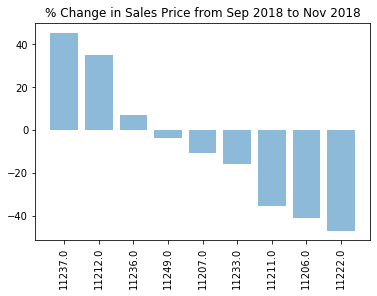

In [7]:
df_all_months_L= df_all_months_L.sort_values(by=["Sales_Price_Change_Sep_Nov"], ascending=False)

objects = df_all_months_L["ZIP CODE"]
y_pos = np.arange(len(objects))
percent_change = df_all_months_L["Sales_Price_Change_Sep_Nov"]

plt.bar(y_pos, percent_change, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xticks(rotation="vertical")
#plt.ylabel('Usage')
plt.title('% Change in Sales Price from Sep 2018 to Nov 2018')

plt.show()

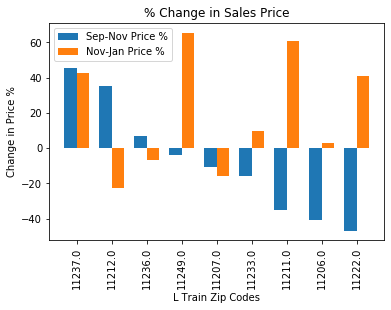

In [8]:
import numpy as np
import matplotlib.pyplot as plt


N = 9
menMeans = df_all_months_L["Sales_Price_Change_Sep_Nov"]

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, menMeans, width, bottom=0)


womenMeans = df_all_months_L["Sales_Price_Change_Nov_Jan"]
p2 = ax.bar(ind + width, womenMeans, width, bottom=0)

ax.set_title('% Change in Sales Price')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df_all_months_L["ZIP CODE"])
plt.xticks(rotation="vertical")

ax.legend((p1[0], p2[0]), ('Sep18 - Nov18', 'Nov18 - Jan19'))
ax.legend((p1[0], p2[0]), ('Sep-Nov Price %', 'Nov-Jan Price %'))
plt.xlabel("L Train Zip Codes")
plt.ylabel("Change in Price %")
#ax.yaxis.set_units(inch)
#ax.autoscale_view()

plt.show()


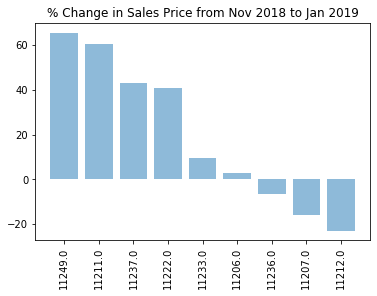

In [9]:
df_all_months_L= df_all_months_L.sort_values(by=["Sales_Price_Change_Nov_Jan"], ascending=False)

objects = df_all_months_L["ZIP CODE"]
y_pos = np.arange(len(objects))
percent_change = df_all_months_L["Sales_Price_Change_Nov_Jan"]

plt.bar(y_pos, percent_change, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xticks(rotation="vertical")
#plt.ylabel('Usage')
plt.title('% Change in Sales Price from Nov 2018 to Jan 2019')

plt.show()

In [10]:
source3 = 'Alternative to L Updated.csv'
df_Alt = pd.read_csv(source3)
df_Alt

,Zip Code,Manhattan Access Alternatives,Total Stations Count
0,11249,0,1
1,11211,2,8
2,11222,0,1
3,11206,3,8
4,11237,2,4
5,11378,0,1
6,11387,2,3
7,11233,7,9
8,11212,4,7
9,11207,11,17


In [11]:
Alternative_Train_Percent = (df_Alt["Manhattan Access Alternatives"]/df_Alt["Total Stations Count"])*100
df_Alt["Alternative_Train_Percent"]=Alternative_Train_Percent

df_Alt = df_Alt.rename(
    columns={"Zip Code": "ZIP CODE"})
df_Alt.head(20)

,ZIP CODE,Manhattan Access Alternatives,Total Stations Count,Alternative_Train_Percent
0,11249,0,1,0.000000
1,11211,2,8,25.000000
2,11222,0,1,0.000000
3,11206,3,8,37.500000
4,11237,2,4,50.000000
5,11378,0,1,0.000000
6,11387,2,3,66.666667
7,11233,7,9,77.777778
8,11212,4,7,57.142857
9,11207,11,17,64.705882


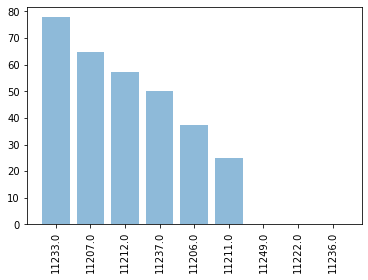

In [12]:
Alt_Summary = pd.merge(df_all_months_L,df_Alt,on="ZIP CODE")

Alt_Summary= Alt_Summary.sort_values(by=["Alternative_Train_Percent"], ascending=False)

objects = Alt_Summary["ZIP CODE"]
y_pos = np.arange(len(objects))
percent_change = Alt_Summary["Alternative_Train_Percent"]

plt.bar(y_pos, percent_change, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xticks(rotation="vertical")
#plt.ylabel('Usage')
#plt.title('Programming language usage')

plt.show()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from scipy.stats import ttest_ind
source1 = 'AirbnbSept19.csv'
source2 = 'Rolling Sales NYC/rollingsales_brooklyn_2019.csv'

abb_sept_2018 = 'AirBnB Listings/with zipcodes/df_abb_sept_2018.csv'
abb_oct_2018 = 'AirBnB Listings/with zipcodes/df_abb_oct_2018.csv'
abb_nov_2018 = 'AirBnB Listings/with zipcodes/df_abb_nov_2018.csv'
abb_dec_2018 = 'AirBnB Listings/with zipcodes/df_abb_dec_2018.csv'
abb_jan_2019 = 'AirBnB Listings/with zipcodes/df_abb_jan_2019.csv'
abb_feb_2019 = 'AirBnB Listings/with zipcodes/df_abb_feb_2019.csv'
abb_mar_2019 = 'AirBnB Listings/with zipcodes/df_abb_mar_2019.csv'

df_abb_sept_2018 = pd.read_csv(abb_sept_2018)
df_abb_oct_2018 = pd.read_csv(abb_oct_2018)
df_abb_nov_2018 = pd.read_csv(abb_nov_2018)
df_abb_dec_2018 = pd.read_csv(abb_dec_2018)
df_abb_jan_2019 = pd.read_csv(abb_jan_2019)
df_abb_feb_2019 = pd.read_csv(abb_feb_2019)
df_abb_mar_2019 = pd.read_csv(abb_mar_2019)

In [14]:
# subset dataframe only to L train zipcode neighborhoods: 
L_train_zip = [11249,11222,11211,11206,11237,11378,11387,11233,11212,11207,11236]

df_abb_sept_2018_sub = df_abb_sept_2018[df_abb_sept_2018['zipcode'].isin(L_train_zip)]
df_abb_oct_2018_sub  = df_abb_oct_2018[df_abb_oct_2018['zipcode'].isin(L_train_zip)]
df_abb_nov_2018_sub  = df_abb_nov_2018[df_abb_nov_2018['zipcode'].isin(L_train_zip)]
df_abb_dec_2018_sub  = df_abb_dec_2018[df_abb_dec_2018['zipcode'].isin(L_train_zip)]
df_abb_jan_2019_sub  = df_abb_jan_2019[df_abb_jan_2019['zipcode'].isin(L_train_zip)]
df_abb_feb_2019_sub  = df_abb_feb_2019[df_abb_feb_2019['zipcode'].isin(L_train_zip)]
df_abb_mar_2019_sub  = df_abb_mar_2019[df_abb_mar_2019['zipcode'].isin(L_train_zip)]

In [15]:
#Median price for L train zip code trains by month
df_abnb_sep18_L_grouped = df_abb_sept_2018_sub.groupby(by='zipcode').agg({'price': 'median'}).reset_index()
df_abnb_oct18_L_grouped = df_abb_oct_2018_sub.groupby(by='zipcode').agg({'price': 'median'}).reset_index()
df_abnb_nov18_L_grouped = df_abb_nov_2018_sub.groupby(by='zipcode').agg({'price': 'median'}).reset_index()
df_abnb_dec18_L_grouped = df_abb_dec_2018_sub.groupby(by='zipcode').agg({'price': 'median'}).reset_index()
df_abnb_jan19_L_grouped = df_abb_jan_2019_sub.groupby(by='zipcode').agg({'price': 'median'}).reset_index()
df_abnb_feb19_L_grouped = df_abb_feb_2019_sub.groupby(by='zipcode').agg({'price': 'median'}).reset_index()
df_abnb_mar19_L_grouped = df_abb_mar_2019_sub.groupby(by='zipcode').agg({'price': 'median'}).reset_index()

In [16]:
#Merging median price by zipcode monthly
ABNB_Summary = pd.merge(df_abnb_sep18_L_grouped,df_abnb_oct18_L_grouped,on="zipcode")
ABNB_Summary = ABNB_Summary.rename(
    columns={"price_x": "ABB Sep18 Price","price_y":"ABB Oct18 Price"})

ABNB_Summary2 = pd.merge(ABNB_Summary,df_abnb_nov18_L_grouped,on="zipcode")
ABNB_Summary2 = ABNB_Summary2.rename(
    columns={"price": "ABB Nov18 Price"})

ABNB_Summary3 = pd.merge(ABNB_Summary2,df_abnb_dec18_L_grouped,on="zipcode")
ABNB_Summary3 = ABNB_Summary3.rename(
    columns={"price": "ABB Dec18 Price"})

ABNB_Summary4 = pd.merge(ABNB_Summary3,df_abnb_jan19_L_grouped,on="zipcode")
ABNB_Summary4 = ABNB_Summary4.rename(
    columns={"price": "ABB Jan19 Price"})

ABNB_Summary4 

,zipcode,ABB Sep18 Price,ABB Oct18 Price,ABB Nov18 Price,ABB Dec18 Price,ABB Jan19 Price
0,11206,69,69.0,69,70,69
1,11207,67,70.0,70,70,70
2,11211,105,105.0,109,110,109
3,11212,69,69.0,70,70,70
4,11222,115,115.0,116,120,117
5,11233,70,70.0,70,70,70
6,11236,80,80.0,79,79,80
7,11237,63,62.5,65,65,62
8,11378,75,70.0,75,70,70


In [17]:
ABB_Price_Change_Sep_Nov = ((ABNB_Summary4["ABB Nov18 Price"]-ABNB_Summary4["ABB Sep18 Price"])/ABNB_Summary4["ABB Sep18 Price"])*100
ABNB_Summary4["ABB_Price_Change_Sep_Nov"] = ABB_Price_Change_Sep_Nov

ABNB_Summary4= ABNB_Summary4.sort_values(by=["ABB_Price_Change_Sep_Nov"], ascending=False)

ABB_Price_Change_Nov_Jan = ((ABNB_Summary4["ABB Jan19 Price"]-ABNB_Summary4["ABB Nov18 Price"])/ABNB_Summary4["ABB Nov18 Price"])*100
ABNB_Summary4["ABB_Price_Change_Nov_Jan"] = ABB_Price_Change_Nov_Jan

ABNB_Summary4.head()

,zipcode,ABB Sep18 Price,ABB Oct18 Price,ABB Nov18 Price,ABB Dec18 Price,ABB Jan19 Price,ABB_Price_Change_Sep_Nov,ABB_Price_Change_Nov_Jan
1,11207,67,70.0,70,70,70,4.477612,0.000000
2,11211,105,105.0,109,110,109,3.809524,0.000000
7,11237,63,62.5,65,65,62,3.174603,-4.615385
3,11212,69,69.0,70,70,70,1.449275,0.000000
4,11222,115,115.0,116,120,117,0.869565,0.862069


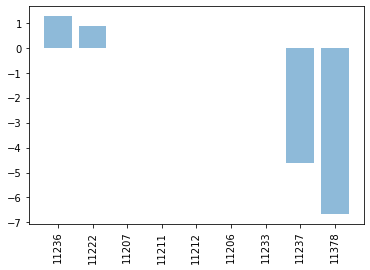

In [18]:
ABNB_Summary4= ABNB_Summary4.sort_values(by=["ABB_Price_Change_Nov_Jan"], ascending=False)
#Percent Change of Airbnb by Zip code Oct to Nov
objects = ABNB_Summary4["zipcode"]
y_pos = np.arange(len(objects))
percent_change = ABNB_Summary4["ABB_Price_Change_Nov_Jan"]

plt.bar(y_pos, percent_change, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xticks(rotation="vertical")
#plt.ylabel('Usage')
#plt.title('Programming language usage')

plt.show()

In [19]:
ABNB_Summary4 = ABNB_Summary4.rename(
    columns={"zipcode": "ZIP CODE"})

Combo = pd.merge(ABNB_Summary4,df_all_months_L,on="ZIP CODE")
Combo

,ZIP CODE,ABB Sep18 Price,ABB Oct18 Price,ABB Nov18 Price,ABB Dec18 Price,ABB Jan19 Price,ABB_Price_Change_Sep_Nov,ABB_Price_Change_Nov_Jan,SALE PRICE Sept 2018,SALE PRICE Oct 2018,SALE PRICE Nov 2018,SALE PRICE Dec 2018,SALE PRICE Jan 2019,SALE PRICE Feb 2019,SALE PRICE,Sales_Price_Change_Sep_Nov,Sales_Price_Change_Nov_Jan
0,11236,80,80.0,79,79,80,-1.250000,1.265823,500000.0,550000.0,535000.0,590000.0,500000.0,585000.0,550000.0,7.000000,-6.542056
1,11222,115,115.0,116,120,117,0.869565,0.862069,2100000.0,1353750.0,1117500.0,1049950.0,1575000.0,1337500.0,1398843.5,-46.785714,40.939597
2,11207,67,70.0,70,70,70,4.477612,0.000000,650000.0,515000.0,580000.0,499999.0,488125.0,590585.0,480000.0,-10.769231,-15.840517
3,11211,105,105.0,109,110,109,3.809524,0.000000,1200000.0,774429.5,778526.0,995000.0,1250000.0,1359500.0,960000.0,-35.122833,60.559827
4,11212,69,69.0,70,70,70,1.449275,0.000000,515000.0,450000.0,696500.0,613740.0,537500.0,717500.0,610250.0,35.242718,-22.828428
5,11206,69,69.0,69,70,69,0.000000,0.000000,1235000.0,681799.5,729474.0,749228.0,749228.0,698112.0,1350000.0,-40.933279,2.707979
6,11233,70,70.0,70,70,70,0.000000,0.000000,917225.0,966000.0,772000.0,900000.0,845000.0,625000.0,735000.0,-15.833083,9.455959
7,11237,63,62.5,65,65,62,3.174603,-4.615385,842500.0,850000.0,1225000.0,801250.0,1750000.0,1637500.0,1550000.0,45.400593,42.857143


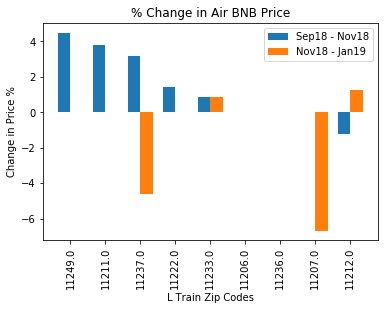

In [20]:
ABNB_Summary4= ABNB_Summary4.sort_values(by=["ABB_Price_Change_Sep_Nov"], ascending=False)
N = 9
group1 = ABNB_Summary4["ABB_Price_Change_Sep_Nov"]

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, group1, width, bottom=0)


group2 = ABNB_Summary4["ABB_Price_Change_Nov_Jan"]
p2 = ax.bar(ind + width, group2, width, bottom=0)

ax.set_title('% Change in Air BNB Price')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df_all_months_L["ZIP CODE"])
plt.xticks(rotation="vertical")

plt.xlabel("L Train Zip Codes")
plt.ylabel("Change in Price %")

ax.legend((p1[0], p2[0]), ('Sep18 - Nov18', 'Nov18 - Jan19'))
#ax.yaxis.set_units(inch)
#ax.autoscale_view()


plt.show()

In [21]:
Combo = Combo.sort_values(by=["Sales_Price_Change_Nov_Jan"], ascending=False)
Combo

,ZIP CODE,ABB Sep18 Price,ABB Oct18 Price,ABB Nov18 Price,ABB Dec18 Price,ABB Jan19 Price,ABB_Price_Change_Sep_Nov,ABB_Price_Change_Nov_Jan,SALE PRICE Sept 2018,SALE PRICE Oct 2018,SALE PRICE Nov 2018,SALE PRICE Dec 2018,SALE PRICE Jan 2019,SALE PRICE Feb 2019,SALE PRICE,Sales_Price_Change_Sep_Nov,Sales_Price_Change_Nov_Jan
3,11211,105,105.0,109,110,109,3.809524,0.000000,1200000.0,774429.5,778526.0,995000.0,1250000.0,1359500.0,960000.0,-35.122833,60.559827
7,11237,63,62.5,65,65,62,3.174603,-4.615385,842500.0,850000.0,1225000.0,801250.0,1750000.0,1637500.0,1550000.0,45.400593,42.857143
1,11222,115,115.0,116,120,117,0.869565,0.862069,2100000.0,1353750.0,1117500.0,1049950.0,1575000.0,1337500.0,1398843.5,-46.785714,40.939597
6,11233,70,70.0,70,70,70,0.000000,0.000000,917225.0,966000.0,772000.0,900000.0,845000.0,625000.0,735000.0,-15.833083,9.455959
5,11206,69,69.0,69,70,69,0.000000,0.000000,1235000.0,681799.5,729474.0,749228.0,749228.0,698112.0,1350000.0,-40.933279,2.707979
0,11236,80,80.0,79,79,80,-1.250000,1.265823,500000.0,550000.0,535000.0,590000.0,500000.0,585000.0,550000.0,7.000000,-6.542056
2,11207,67,70.0,70,70,70,4.477612,0.000000,650000.0,515000.0,580000.0,499999.0,488125.0,590585.0,480000.0,-10.769231,-15.840517
4,11212,69,69.0,70,70,70,1.449275,0.000000,515000.0,450000.0,696500.0,613740.0,537500.0,717500.0,610250.0,35.242718,-22.828428


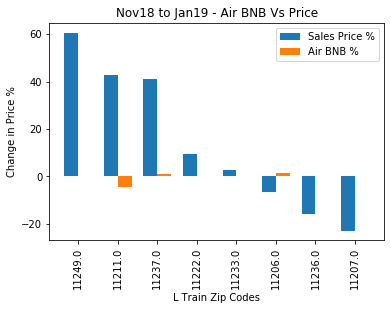

In [22]:
Combo = Combo.sort_values(by=["Sales_Price_Change_Nov_Jan"], ascending=False)

N = 8
menMeans = Combo["Sales_Price_Change_Nov_Jan"]

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, menMeans, width, bottom=0)


womenMeans = Combo["ABB_Price_Change_Nov_Jan"]
p2 = ax.bar(ind + width, womenMeans, width, bottom=0)

ax.set_title('Nov18 to Jan19 - Air BNB Vs Price')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df_all_months_L["ZIP CODE"])
plt.xticks(rotation="vertical")

ax.legend((p1[0], p2[0]), ('Sales Price %', 'Air BNB %'))

plt.xlabel("L Train Zip Codes")
plt.ylabel("Change in Price %")

#ax.yaxis.set_units(inch)
#ax.autoscale_view()

plt.show()

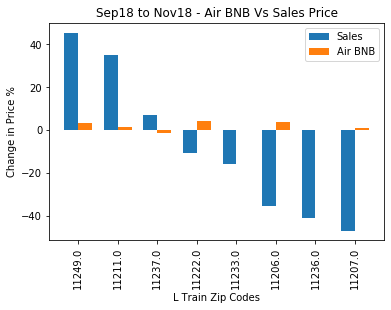

In [24]:
Combo = Combo.sort_values(by=["Sales_Price_Change_Sep_Nov"], ascending=False)

N = 8
menMeans = Combo["Sales_Price_Change_Sep_Nov"]

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, menMeans, width, bottom=0)


womenMeans = Combo["ABB_Price_Change_Sep_Nov"]
p2 = ax.bar(ind + width, womenMeans, width, bottom=0)

ax.set_title('Sep18 to Nov18 - Air BNB Vs Sales Price')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(df_all_months_L["ZIP CODE"])
plt.xticks(rotation="vertical")

ax.legend((p1[0], p2[0]), ('Sales', 'Air BNB'))

plt.xlabel("L Train Zip Codes")
plt.ylabel("Change in Price %")

#ax.yaxis.set_units(inch)
#ax.autoscale_view()

plt.show()